# Logistic Regrecion with Pets Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig = load_dataset()

In [24]:
classes = np.array(['dog', 'cat'], dtype='|S7')
classes

array([b'dog', b'cat'],
      dtype='|S7')

In [4]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(25000, 64, 64, 3)
(1, 25000)


In [37]:
def imagen_recover(img):
    imagen = (img - np.min(img)) / (np.max(img) - np.min(img))
    return imagen

y = [0], it's a 'dog' picture.


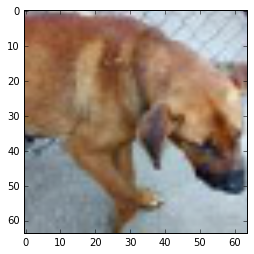

In [38]:
# Example of a picture
index = 25
imagen = (imagen_recover(train_set_x_orig[index]) - np.min(imagen_recover(train_set_x_orig[index]))) / (np.max(imagen_recover(train_set_x_orig[index])) - np.min(imagen_recover(train_set_x_orig[index])))
plt.imshow(imagen)

print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [6]:
train_set_x_mod = train_set_x_orig[:300,:,:,:]
train_set_y_mod = train_set_y[:,:300]
print(train_set_x_mod.shape)
print(train_set_y_mod.shape)

(300, 64, 64, 3)
(1, 300)


In [7]:
train_set_x_mod_flatten =  train_set_x_mod.reshape(train_set_x_mod.shape[0], -1)
print(train_set_x_mod_flatten.shape)

X_train, X_test, y_train, y_test = train_test_split(train_set_x_mod_flatten, \
                                                    train_set_y_mod.T, test_size=0.2, random_state=42)

(300, 12288)


In [8]:
X_train = X_train.T
X_test = X_test.T
Y_train = y_train.T
Y_test = y_test.T
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 240)
(1, 240)
(12288, 60)
(1, 60)


In [9]:
print(np.max(X_train[0]))
print(np.min(X_train[0]))

0.011868
-0.0109023


In [10]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [11]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0.0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [12]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X) + b)              # compute activation
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                 # compute cost
    ### END CODE HERE ###
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m) * np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
# GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X) + b)
    ### END CODE HERE ###
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i] < 0.5:
            Y_prediction[0,i] = 0
        elif A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            pass
            
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [15]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    #w, b = np.zeros((X_train.shape[0],1)), 0.0
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test =  predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [16]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 59.583333333333336 %
test accuracy: 60.0 %


In [40]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 3000, learning_rate = 0.005, print_cost = True)

train accuracy: 64.16666666666666 %
test accuracy: 61.666666666666664 %


In [50]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

train accuracy: 66.25 %
test accuracy: 60.0 %


0
y = 0, you predicted that it is a "dog" picture.


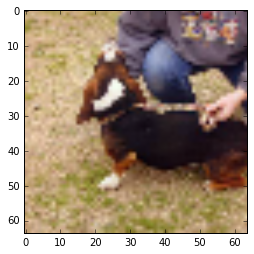

In [47]:
# Example of a picture that was wrongly classified.
index = 58
num_px = 64
num_py = 64
img = X_test[:,index].reshape((num_px, num_px, 3))
img_to_show = imagen_recover(img)
plt.imshow(img_to_show)
print(int(d["Y_prediction_test"][0,index]))
cls = {1:'cat', 0 : 'dog'}

print ("y = " + str(Y_test[0,index]) + ", you predicted that it is a \"" + cls[int(d["Y_prediction_test"][0,index])] +  "\" picture.")

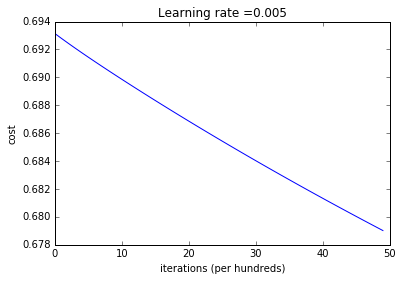

In [51]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 64.16666666666666 %
test accuracy: 61.666666666666664 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 53.75 %
test accuracy: 56.666666666666664 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 52.5 %
test accuracy: 58.33333333333333 %

-------------------------------------------------------



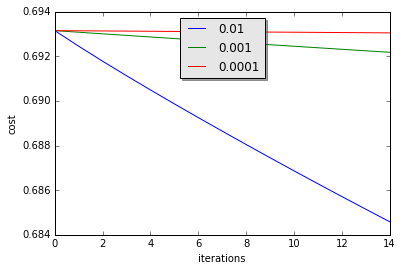

In [53]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()